#### WE ONLY HAVE 3 STATIONS WE NEED MORE DATA

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import cmocean.cm as cmo
#import cartopy.crs as ccrs # these ones are not needed
#import cartopy.feature as cfeature  #these ones are not needed
import matplotlib as mpl
import gsw
import warnings
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings("ignore")
#import OWSLib
font = {'size'   : 13}
mpl.rc('font', **font)

In [8]:
station_info = pd.read_csv('byfjorden_clean_data.csv') # import your data

In [9]:
station_info #look at data

,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,C0,prDM,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
0,0,0,58.33289,11.87168,39.358724,15.2260,15.2260,2.847648,2.847648,1.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,58.33294,11.87170,39.358961,15.1916,15.1916,2.833230,2.833230,1.514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,58.33294,11.87170,39.358962,15.1439,15.1439,2.803977,2.803977,2.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,58.33294,11.87170,39.358978,15.5512,15.5512,2.881293,2.881293,2.523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,58.33294,11.87170,39.358992,15.6653,15.6653,2.942498,2.942498,3.028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131744,19663,19663,NaN,NaN,NaN,NaN,NaN,3.364376,3.364376,16.828,...,2039.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5287,NaN,NaN
131745,19664,19664,NaN,NaN,NaN,NaN,NaN,3.364338,3.364338,16.828,...,2040.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5324,NaN,NaN
131746,19665,19665,NaN,NaN,NaN,NaN,NaN,3.364312,3.364312,16.829,...,2041.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5345,NaN,NaN
131747,19666,19666,NaN,NaN,NaN,NaN,NaN,3.364297,3.364297,16.829,...,2042.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5353,NaN,NaN


In [10]:
#separating the year

ctd_data_2019 = station_info[station_info['Year'] == 2019]
ctd_data_2019

In [43]:
#checking what stations do we have

np.unique(ctd_data_2019["STATION"]) 

array(['ST_1', 'ST_2', 'ST_6'], dtype=object)

In [44]:
array_2019 = ctd_data_2019.to_xarray().set_coords(['STATION'])  # transform the pandas dataframe to an xarray dataset

In [45]:
np.unique(array_2019.STATION) # get all the different stations in the dataset by calling on the unique station names

array(['ST_1', 'ST_2', 'ST_6'], dtype=object)

In [28]:
step1 = array_2019.groupby('STATION')['ST_1'] # testing functions for the loop
step2 = step1.set_coords('prDM')
step3 = step2.swap_dims({'index':'prDM'})
step4 = step3.sortby('prDM')
step7 = step4.expand_dims({'Station':['ST_1']})
#step8 = step7.groupby('prDM').mean('prDM') # we don't need this as we don't have repeating values
step9 = step7.interp(prDM=np.arange(0,50.1,0.5))

In [29]:
temp = []

for station in np.unique(array_2019.STATION):                # the index in station -> the loop goes throu every station
    
    step1 = array_2019.groupby('STATION')[station]           # grouping every station together
    step2 = step1.set_coords('prDM')                 # determin prDM as a coordinate
    step3 = step2.swap_dims({'index':'prDM'})        # replace the index dimension with prDM as a dimention
    step4 = step3.sortby('prDM')                     # sort prDM so that they are in ascended order
    
    step7 = step4.expand_dims({'Station':[station]}) # adding station as a dimention

#    step8 = step7.groupby('prDM').mean('prDM')       # group the values by prDM groups, them culculate the mean of them

    step9 = step7.interp(prDM=np.arange(0,50.1,0.5)) # now interpolate it (grid it), 
    
    temp.append(step9)
    print(station)
#DS  = xr.concat(temp,dim='Station')


ST_1
ST_2
ST_6


In [30]:
DS = xr.concat(temp,dim='Station')

In [31]:
DS = DS.sel(Station=['ST_1', 'ST_2', 'ST_6'])

In [32]:
[int(station[3:]) for station in DS.Station.values]

[1, 2, 6]

In [33]:
DS['Station'] = np.array([int(station[3:]) for station in DS.Station.values])

In [34]:
DS['latitude'] = DS['latitude'].mean('prDM')
DS['longitude'] = DS['longitude'].mean('prDM')


In [35]:
DS['distance'] = ('Station'), np.zeros(len(DS.Station))

In [36]:
DS['distance'][1:] = np.cumsum(gsw.distance(DS['longitude'],DS['latitude']))/1000

In [37]:
DS = DS.rename({'t090C':'temperature'})

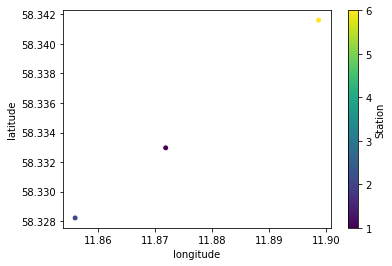

In [38]:
DS.plot.scatter(x='longitude',y='latitude',hue='Station')

In [39]:
DS = DS.set_coords(['longitude','latitude'])

In [40]:
DS_sorted = DS.sortby('longitude') # the stations in the next code have to be in the order of increasing x axis (longitude) 
                               # so using this to see what is the order
DS_sorted

<xarray.Dataset>
Dimensions:       (Station: 3, prDM: 101)
Coordinates:
  * Station       (Station) int64 2 1 6
    index         (Station, prDM) float64 nan nan 87.98 88.97 ... nan nan nan
    latitude      (Station) float64 58.33 58.33 58.34
    longitude     (Station) float64 11.86 11.87 11.9
  * prDM          (prDM) float64 0.0 0.5 1.0 1.5 2.0 ... 48.5 49.0 49.5 50.0
    STATION       (Station, prDM) object 'ST_2' 'ST_2' 'ST_2' ... 'ST_6' 'ST_6'
Data variables: (12/33)
    Unnamed: 0.1  (Station, prDM) float64 nan nan 87.98 88.97 ... nan nan nan
    Unnamed: 0    (Station, prDM) float64 nan nan 87.98 88.97 ... nan nan nan
    timeJ         (Station, prDM) float64 nan nan 39.39 39.39 ... nan nan nan
    temperature   (Station, prDM) float64 nan nan 14.88 14.89 ... nan nan nan
    T0            (Station, prDM) float64 nan nan 14.88 14.89 ... nan nan nan
    c0S/m         (Station, prDM) float64 nan nan 2.683 2.689 ... nan nan nan
    ...            ...
    sbeox1V       (Station, prDM) float64 nan nan nan nan ... nan nan nan nan
    oxy1          (Station, prDM) float64 nan nan nan nan ... nan nan nan nan
    xmiss         (Station, prDM) float64 nan nan nan nan ... nan nan nan nan
    potemp090C    (Station, prDM) float64 nan nan nan nan ... nan nan nan nan
    sbeox0PS      (Station, prDM) float64 nan nan nan nan ... nan nan nan nan
    distance      (Station) float64 1.069 0.0 3.978

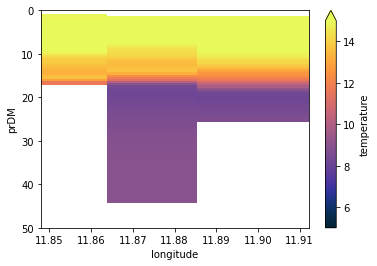

In [41]:
DS.sel(Station=[2,  1, 6])['temperature'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.thermal',
                                                                                               vmin=5,vmax=15)
#all stations have to be with different names and written in row of increasing longitude; vmax and vmin allow to change the limits of colour bar

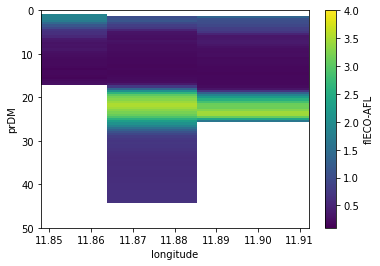

In [42]:
#Galima daugiau virsaus nukirpt ir kartu reik kazkaip pakeist vienetus
DS.sel(Station=[2, 1, 6])['flECO-AFL'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.1,vmax=4)

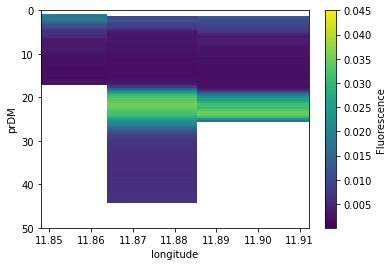

In [57]:
#Same plot with the "fixed" fluoresence data
DS.sel(Station=[2, 1, 6])['Fluorescence'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.0001,vmax=0.045)

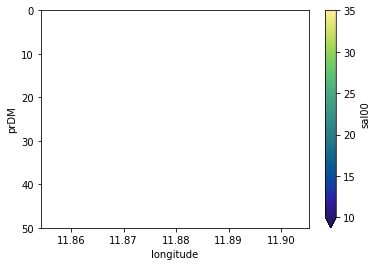

In [48]:
DS.sel(Station=[23,  33,  13,  29, 110,  22,  12,  32, 210,  39,  31,  21,  11])['sal00'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.haline',
                                                                                               vmin=10,vmax=35)